信長の野望・創造 Nobunaga no Yabō: Sōzō

A look into the 2000+ characters, or bushō (武将) in the game.

With the help of N14PK_Browse.exe

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['All_Bushou.csv']), encoding = 'utf-8')

Saving All_Bushou.csv to All_Bushou.csv


In [ ]:
df.head()

,ID,軍団,名前,城,所在,血族,一門,実父,養父,配偶者,身分詳細,城主,奉行,隠居,女性,傷病,年齢,余命,仕官,格,統率,武勇,知略,政治,戦法,特性,成長型,主義(創造),忠計,必忠,叛心,登場国,馬印,旗,病死,信仰,出自,士道,アドレス
0,0,143966836,蠣崎季広,136252132,NaN,0,True,蠣崎義広,NaN,NaN,大名,True,False,False,False,0,109,-20,1,1,66,54,74,79,144281080,0,3,中道(50),3,8,0,144089716,0,0,True,1,0,3,080AB424
1,1,143966836,蠣崎慶広,136252132,NaN,0,True,蠣崎季広,NaN,NaN,家臣,False,True,False,False,0,68,1,1,1,68,54,71,83,144277972,1,7,中道(50),7,11,0,144089716,0,0,True,1,0,1,080AB594
2,2,143966836,蠣崎盛広,136252132,NaN,0,True,蠣崎慶広,NaN,NaN,家臣,False,False,False,False,0,45,-7,1,0,50,46,37,68,144281376,0,2,創造(70),5,3,0,144089716,0,0,True,1,0,1,080AB704
3,3,143966836,蠣崎守広,136252132,NaN,0,True,蠣崎季広,NaN,NaN,家臣,False,False,False,False,0,52,20,1,0,42,46,52,62,144278860,0,8,中道(60),8,5,0,144089716,0,0,False,1,0,3,080AB874
4,4,143966836,近藤義武,136252132,NaN,131,False,NaN,NaN,NaN,家臣,False,False,False,False,0,47,23,1,0,56,71,63,60,144278564,0,1,中道(50),-1,5,0,144089716,0,0,True,1,0,0,080AB9E4


In [ ]:
df = df.set_index(df['ID'])
df = df.drop(columns = ['ID'])
df = df.rename({'軍団': 'Legion', '名前': 'Name', '城': 'City', '所在': 'Whereabout', '血族': 'Bloodline', '一門': 'HasSameBloodline', '実父': 'BiologicalFather', '養父': 'AdoptiveFather', \
                '配偶者': 'Spouse', '身分詳細': 'Title', '城主': 'IsCityCommander', '奉行': 'IsInternalChief', '隠居': 'IsRetired', '女性': 'IsFemale', '傷病': 'IsWoundedOrSick', '年齢': 'Age', \
                '余命': 'YearsTillDeath', '仕官': 'YearsSinceEmployed', '格': 'Rank', '統率': 'Command', '武勇': 'Valor', '知略': 'Resourcefulness', '政治': 'Governing', '戦法': 'BattleMove', \
                '特性': 'Skills', '成長型': 'SkillTrack', '主義(創造)': 'Ideology', '忠計': 'AllegianceAddOn', '必忠': 'AllegianceNeeded', '叛心': 'Betrayal', '登場国': 'PlaceOfOrigin', \
                '馬印': 'HorseInsignia', '旗': 'Flag', '病死': 'DiedInDisease', '信仰': 'Faith', '出自': 'ClassOfOrigin', '士道': 'PathOfBushidou', 'アドレス': 'Address'}, axis = 1)

In [ ]:
df['Overall'] = df['Command'] + df['Valor'] + df['Resourcefulness'] + df['Governing']
df['Creativeness'] = df['Ideology'].str.extract('(\d+)').astype(int)
df.head()

,Legion,Name,City,Whereabout,Bloodline,HasSameBloodline,BiologicalFather,AdoptiveFather,Spouse,Title,IsCityCommander,IsInternalChief,IsRetired,IsFemale,IsWoundedOrSick,Age,YearsTillDeath,YearsSinceEmployed,Rank,Command,Valor,Resourcefulness,Governing,BattleMove,Skills,SkillTrack,Ideology,AllegianceAddOn,AllegianceNeeded,Betrayal,PlaceOfOrigin,HorseInsignia,Flag,DiedInDisease,Faith,ClassOfOrigin,PathOfBushidou,Address,Overall,Creativeness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,143966836,蠣崎季広,136252132,NaN,0,True,蠣崎義広,NaN,NaN,大名,True,False,False,False,0,109,-20,1,1,66,54,74,79,144281080,0,3,中道(50),3,8,0,144089716,0,0,True,1,0,3,080AB424,273,50
1,143966836,蠣崎慶広,136252132,NaN,0,True,蠣崎季広,NaN,NaN,家臣,False,True,False,False,0,68,1,1,1,68,54,71,83,144277972,1,7,中道(50),7,11,0,144089716,0,0,True,1,0,1,080AB594,276,50
2,143966836,蠣崎盛広,136252132,NaN,0,True,蠣崎慶広,NaN,NaN,家臣,False,False,False,False,0,45,-7,1,0,50,46,37,68,144281376,0,2,創造(70),5,3,0,144089716,0,0,True,1,0,1,080AB704,201,70
3,143966836,蠣崎守広,136252132,NaN,0,True,蠣崎季広,NaN,NaN,家臣,False,False,False,False,0,52,20,1,0,42,46,52,62,144278860,0,8,中道(60),8,5,0,144089716,0,0,False,1,0,3,080AB874,202,60
4,143966836,近藤義武,136252132,NaN,131,False,NaN,NaN,NaN,家臣,False,False,False,False,0,47,23,1,0,56,71,63,60,144278564,0,1,中道(50),-1,5,0,144089716,0,0,True,1,0,0,080AB9E4,250,50


Remove those that are not "bushou proper" in the game

In [ ]:
df.groupby('Title').size()

Title
他         258
国人衆       166
大名         76
家臣       1718
家臣(姫)      13
浪人         21
dtype: int64

In [ ]:
df1 = df.loc[~df['Title'].isin(['他', '国人衆']), :].copy()
df1.shape

(1828, 40)

In [ ]:
df1['IdInClan'] = df1.groupby('Bloodline')['Overall'].rank(method="first", ascending=False).astype(int)

Top 10 bushou (武将), based on overall abilities

In [ ]:
df1.sort_values(by = ['Overall', 'Command'], ascending=False)[:10]

,Legion,Name,City,Whereabout,Bloodline,HasSameBloodline,BiologicalFather,AdoptiveFather,Spouse,Title,IsCityCommander,IsInternalChief,IsRetired,IsFemale,IsWoundedOrSick,Age,YearsTillDeath,YearsSinceEmployed,Rank,Command,Valor,Resourcefulness,Governing,BattleMove,Skills,SkillTrack,Ideology,AllegianceAddOn,AllegianceNeeded,Betrayal,PlaceOfOrigin,HorseInsignia,Flag,DiedInDisease,Faith,ClassOfOrigin,PathOfBushidou,Address,Overall,Creativeness,IdInClan
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
338,143973940,織田信長,137537332,NaN,44,True,織田信秀,NaN,NaN,大名,True,False,False,False,0,82,-33,1,3,99,87,94,100,144279896,1,34,創造(100),3,12,0,144094196,95,1,False,0,0,5,080C9A04,380,100,1
453,143974828,武田信玄,136466332,NaN,53,True,武田信虎,NaN,三条の方,大名,True,False,False,False,0,95,-42,1,3,100,88,94,97,144279156,1,37,保守(25),3,14,0,144092236,0,3,True,1,0,7,080D3F54,379,25,1
770,143981636,毛利元就,136882832,NaN,98,True,NaN,NaN,妙玖,大名,True,True,False,False,0,119,-44,1,3,97,80,100,96,144281672,1,44,保守( 5),3,11,0,144097136,0,0,True,1,0,1,080F0704,373,5,1
252,143973348,北条氏康,136454432,NaN,40,True,北条氏綱,NaN,NaN,大名,True,False,False,False,0,101,-44,1,3,95,86,90,99,144290848,2,39,中道(50),3,8,0,144092096,0,5,True,1,0,1,080C1E64,370,50,1
298,143973052,徳川家康,136621032,NaN,42,True,松平広忠,NaN,NaN,大名,True,True,False,False,0,74,1,1,3,99,86,90,94,144280044,2,36,中道(55),3,9,0,144094056,0,2,True,1,0,3,080C6084,369,55,1
362,143967724,羽柴秀吉,136775732,NaN,46,True,木下弥右衛門,NaN,ねね,大名,True,True,False,False,0,79,-17,1,3,94,78,97,99,144288628,2,35,創造(90),3,12,0,144094196,94,4,True,1,7,2,080CBC84,368,90,1
123,143971276,伊達政宗,136299732,NaN,21,True,伊達輝宗,NaN,NaN,大名,True,True,False,False,0,49,21,1,3,96,88,91,89,144290996,1,43,創造(100),3,14,0,144090976,0,0,True,1,0,7,080B64F4,364,100,1
416,143968316,明智光秀,136704332,NaN,49,True,明智光綱,NaN,NaN,大名,True,False,False,False,0,88,-33,1,2,95,85,93,91,144288332,2,51,中道(55),3,10,0,144094336,0,0,False,1,0,7,080D0A24,364,55,1
1393,143973348,北条氏綱,136454432,NaN,40,True,北条早雲,NaN,NaN,家臣,False,False,False,False,0,129,-74,1,3,94,82,93,92,144290848,1,88,中道(50),8,13,0,144092096,0,5,True,1,0,1,8128694,361,50,2


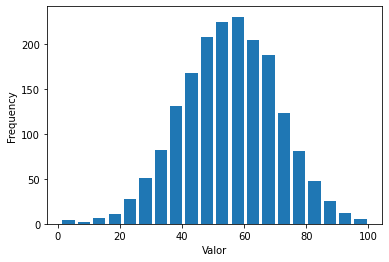

In [ ]:
import matplotlib.pyplot as plt
df1['Valor'].plot(y = 'Valor', kind='hist', bins = 20, rwidth = 0.8)
plt.xlabel('Valor')
plt.show()

Ideology (creativeness) ranges from 0 to 100

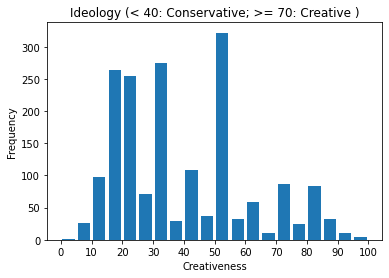

In [ ]:
df1['Creativeness'].plot(y = 'Creativeness', kind='hist', bins = 20, rwidth = 0.8)
plt.xlabel('Creativeness')
plt.title('Ideology (< 40: Conservative; >= 70: Creative )')
plt.xticks(range(0, 110, 10))
plt.show()

People with the same Bloodline are in a clan. Find the largest clans.

In [ ]:
clans = df1.groupby('Bloodline').size()
df1["ClanSize"] = df["Bloodline"].map(clans)
df1.loc[(df1['ClanSize']>= 8) & (df1['IdInClan'] == 1), ['Name', 'Bloodline', 'IdInClan', 'ClanSize']].sort_values(by='ClanSize', ascending=False)

,Name,Bloodline,IdInClan,ClanSize
ID,,,,
338,織田信長,44,1,18.0
123,伊達政宗,21,1,17.0
656,三好長慶,80,1,14.0
252,北条氏康,40,1,13.0
479,真田昌幸,54,1,13.0
967,島津義弘,124,1,13.0
298,徳川家康,42,1,12.0
453,武田信玄,53,1,12.0
770,毛利元就,98,1,12.0
